# **DS605: Fundamental of Machine Learning Project-2**  
# **Cardiovascular Disease Detection Using Classification**  

---
# Hardik Bharvada - 202418010
# Kashyap Shingala - 202418052
# Jash Virani - 202418061  
# Viraj Modi - 202418060

## Problem Statement : Classificing Cardiovascular Disease Risk

Objective:
The primary objective of this project is to develop a model that can accurately identify individuals at risk of cardiovascular disease (CVD) based on various health-related features. This model aims to assist healthcare professionals in early diagnosis and intervention strategies to reduce the prevalence of cardiovascular diseases.

Data Description:
The dataset includes features such as age, gender, height, weight, blood pressure (systolic and diastolic), cholesterol levels, glucose levels, smoking and alcohol consumption habits, physical activity level, to classify whether the individual has cardiovascular disease (target variable).


## Data Scraping and Pre-processing

We obtained the data from Kaggle.

Kaggle Link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating DataFrame
df = pd.read_csv("D:\Placement\Machine Learning(Classification)\cardio_data.csv")
df

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Hardik Bharvada\AppData\Local\Temp\ipykernel_28508\2973257109.py:7: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Placement\Machine Learning(Classification)\cardio_data.csv")


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Men,5.511811,136.68644,110,80,normal,normal,not smoking,not drinking,active,not present
1,1,20228,Women,5.118110,187.39270,140,90,well above normal,normal,not smoking,not drinking,active,present
2,2,18857,Women,5.413386,141.09568,130,70,well above normal,normal,not smoking,not drinking,not active,present
3,3,17623,Men,5.544620,180.77884,150,100,normal,normal,not smoking,not drinking,active,present
4,4,17474,Women,5.118110,123.45872,100,60,normal,normal,not smoking,not drinking,not active,not present
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,Men,5.511811,167.55112,120,80,normal,normal,smoking,not drinking,active,not present
69996,99995,22601,Women,5.183727,277.78212,140,90,above normal,above normal,not smoking,not drinking,active,present
69997,99996,19066,Men,6.003937,231.48510,180,90,well above normal,normal,not smoking,drinking,not active,present
69998,99998,22431,Women,5.347769,158.73264,135,80,normal,above normal,not smoking,not drinking,not active,present


In [4]:
# Dropping unnecessary columns
df.drop(['id'], axis=1, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,Men,5.511811,136.68644,110,80,normal,normal,not smoking,not drinking,active,not present
1,20228,Women,5.118110,187.39270,140,90,well above normal,normal,not smoking,not drinking,active,present
2,18857,Women,5.413386,141.09568,130,70,well above normal,normal,not smoking,not drinking,not active,present
3,17623,Men,5.544620,180.77884,150,100,normal,normal,not smoking,not drinking,active,present
4,17474,Women,5.118110,123.45872,100,60,normal,normal,not smoking,not drinking,not active,not present
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,Men,5.511811,167.55112,120,80,normal,normal,smoking,not drinking,active,not present
69996,22601,Women,5.183727,277.78212,140,90,above normal,above normal,not smoking,not drinking,active,present
69997,19066,Men,6.003937,231.48510,180,90,well above normal,normal,not smoking,drinking,not active,present
69998,22431,Women,5.347769,158.73264,135,80,normal,above normal,not smoking,not drinking,not active,present


In [5]:
# Shape of DataFrame
df.shape

(70000, 12)

In [6]:
# Accesing which columns are present
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
# 5 point summary
df.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,5.392363,163.595348,128.817286,96.630414
std,2467.251667,0.269361,31.737173,154.011419,188.472530
min,10798.000000,1.804462,22.046200,-150.000000,-70.000000
25%,17664.000000,5.216536,143.300300,120.000000,80.000000
50%,19703.000000,5.413386,158.732640,120.000000,80.000000
75%,21327.000000,5.577428,180.778840,140.000000,90.000000
max,23713.000000,8.202100,440.924000,16020.000000,11000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 6.4+ MB


In [9]:
# Checking duplicates
df.duplicated().sum()

24

In [10]:
df[df.duplicated()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,Women,5.413386,154.32340,120,80,normal,normal,not smoking,not drinking,active,not present
21784,16793,Women,5.413386,149.91416,120,80,normal,normal,not smoking,not drinking,active,not present
38505,18988,Women,5.380578,143.30030,120,80,normal,normal,not smoking,not drinking,active,not present
40365,14552,Women,5.183727,141.09568,120,80,normal,normal,not smoking,not drinking,active,not present
42450,18353,Women,5.544620,147.70954,120,80,normal,normal,not smoking,not drinking,active,not present
44653,16937,Men,5.577428,154.32340,120,80,normal,normal,not smoking,not drinking,not active,not present
45125,21280,Women,5.413386,143.30030,120,80,normal,normal,not smoking,not drinking,active,not present
45748,22077,Women,5.741470,152.11878,120,80,normal,normal,not smoking,not drinking,active,present
45810,21230,Women,5.380578,136.68644,120,80,normal,normal,not smoking,not drinking,active,not present
48917,21945,Women,5.413386,132.27720,120,80,normal,normal,not smoking,not drinking,active,not present


In [11]:
# Drop dupplicates
df.drop_duplicates(inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,Men,5.511811,136.68644,110,80,normal,normal,not smoking,not drinking,active,not present
1,20228,Women,5.118110,187.39270,140,90,well above normal,normal,not smoking,not drinking,active,present
2,18857,Women,5.413386,141.09568,130,70,well above normal,normal,not smoking,not drinking,not active,present
3,17623,Men,5.544620,180.77884,150,100,normal,normal,not smoking,not drinking,active,present
4,17474,Women,5.118110,123.45872,100,60,normal,normal,not smoking,not drinking,not active,not present
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,Men,5.511811,167.55112,120,80,normal,normal,smoking,not drinking,active,not present
69996,22601,Women,5.183727,277.78212,140,90,above normal,above normal,not smoking,not drinking,active,present
69997,19066,Men,6.003937,231.48510,180,90,well above normal,normal,not smoking,drinking,not active,present
69998,22431,Women,5.347769,158.73264,135,80,normal,above normal,not smoking,not drinking,not active,present


In [12]:
# Again Checking duplicates
df.duplicated().sum()

0

In [13]:
# Null values
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Data Pre-processing

In [14]:
# Converting weights in pounds(lbs) to kilogram(kg)
df['weight'] = df['weight'] * 0.453592 # 1 kg = 2.205
df['weight'] = df['weight'].round(2)

# Converting height in feet to centimeter(cm)
df['height'] = df['height'] * 2.54 * 12 # 1 feet = 12 inches and 1 inch = 2.54 cm
df['height'] = df['height'].round().astype('int')

# Converting age from days to years
df['age'] = (df['age'] / 365).round().astype('int')
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,Men,168,62.0,110,80,normal,normal,not smoking,not drinking,active,not present
1,55,Women,156,85.0,140,90,well above normal,normal,not smoking,not drinking,active,present
2,52,Women,165,64.0,130,70,well above normal,normal,not smoking,not drinking,not active,present
3,48,Men,169,82.0,150,100,normal,normal,not smoking,not drinking,active,present
4,48,Women,156,56.0,100,60,normal,normal,not smoking,not drinking,not active,not present
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,Men,168,76.0,120,80,normal,normal,smoking,not drinking,active,not present
69996,62,Women,158,126.0,140,90,above normal,above normal,not smoking,not drinking,active,present
69997,52,Men,183,105.0,180,90,well above normal,normal,not smoking,drinking,not active,present
69998,61,Women,163,72.0,135,80,normal,above normal,not smoking,not drinking,not active,present


In [15]:
df.describe()

,age,height,weight,ap_hi,ap_lo
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,164.359152,74.208519,128.820453,96.636261
std,6.765633,8.211218,14.397211,154.037729,188.504581
min,30.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


Upon closer examination, there are instances where the diastolic pressure is recorded as higher than the systolic pressure, which is impossible; therefore, we should remove these cases from our dataset.

We also notice some irregularities in the height and weight columns, we observe that the minimum height is recorded as 55 cm and the minimum weight as 10 kg. This appears to be an error, especially given that the corresponding minimum age is 10798 days, which converts to 29 years. Conversely, the maximum height listed is 250 cm, and the maximum weight is 200 kg, both of which may be irrelevant for generalizing the data. To address these inaccuracies, we should consider removing outliers.

Sidenote: The worst case value for systolic/diastolic pressure is 180/120. Any value above this requires immediate medical attention, as it can be fatal.

In [16]:
# Checking for such cases where Diastolic pressure is higher than Systolic
print("Diastolic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 1234 cases


In [17]:
# Removing such instances
df = df[(df['ap_lo'] <= df['ap_hi']) & (df['ap_lo'] >= 0) & (df['ap_hi'] >= 0)]

In [18]:
# Rechecking for such cases where Diastolic pressure is higher than Systolic
print("Diastolic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 0 cases


In [19]:
# Function to remove outliers from numeric columns
def remove_outliers_quantile(df, columns, low=0.005, high=0.995):
    for col in columns:
        lower_bound = df[col].quantile(low)
        upper_bound = df[col].quantile(high)
        df = df[df[col].between(lower_bound, upper_bound)]
    return df

# Example usage:
numeric_cols = ['height', 'weight', 'ap_hi', 'ap_lo']  # add columns whose outliers you wish to remove
df = remove_outliers_quantile(df, numeric_cols)


In [20]:
df.describe()

,age,height,weight,ap_hi,ap_lo
count,66924.000000,66924.000000,66924.000000,66924.000000,66924.000000
mean,53.329762,164.444684,73.879964,126.328238,81.176424
std,6.764513,7.552861,13.375886,15.784742,8.949873
min,30.000000,144.000000,45.000000,90.000000,60.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,186.000000,125.000000,180.000000,110.000000


In [21]:
# Now what's the shape of dataframe
df.shape

(66924, 12)

## EDA and Feature Engineering

### Univariate Analysis

In [ ]:
# 5 point summary
df.describe()

,age,height,weight,ap_hi,ap_lo
count,66924.000000,66924.000000,66924.000000,66924.000000,66924.000000
mean,53.329762,164.444684,73.879964,126.328238,81.176424
std,6.764513,7.552861,13.375886,15.784742,8.949873
min,30.000000,144.000000,45.000000,90.000000,60.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,186.000000,125.000000,180.000000,110.000000


<Axes: xlabel='weight', ylabel='Count'>

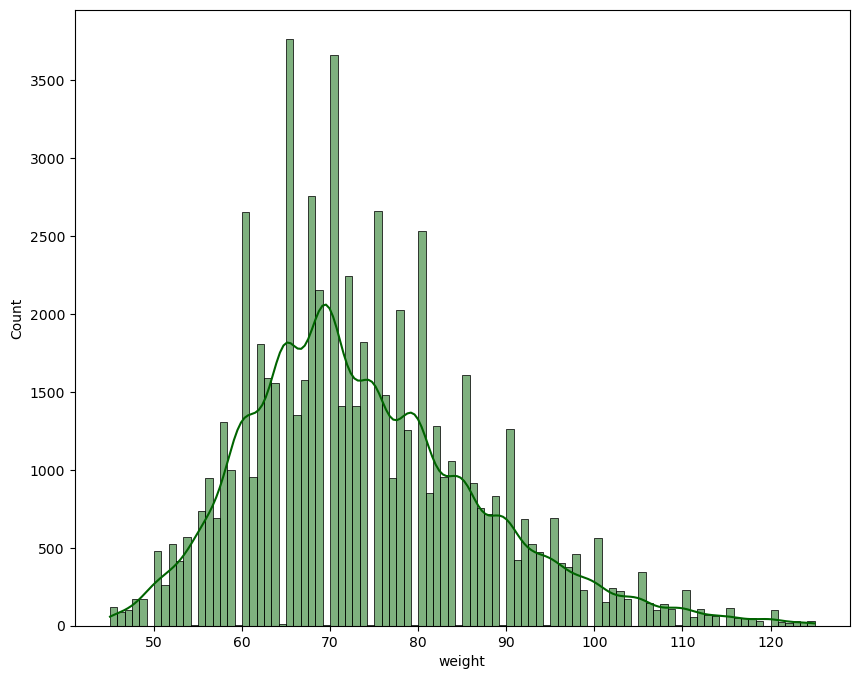

In [ ]:
# Distribution of weight
plt.figure(figsize=(10,8))
sns.histplot(x='weight', data = df, color = 'darkgreen', kde = True)

<Axes: xlabel='height', ylabel='Count'>

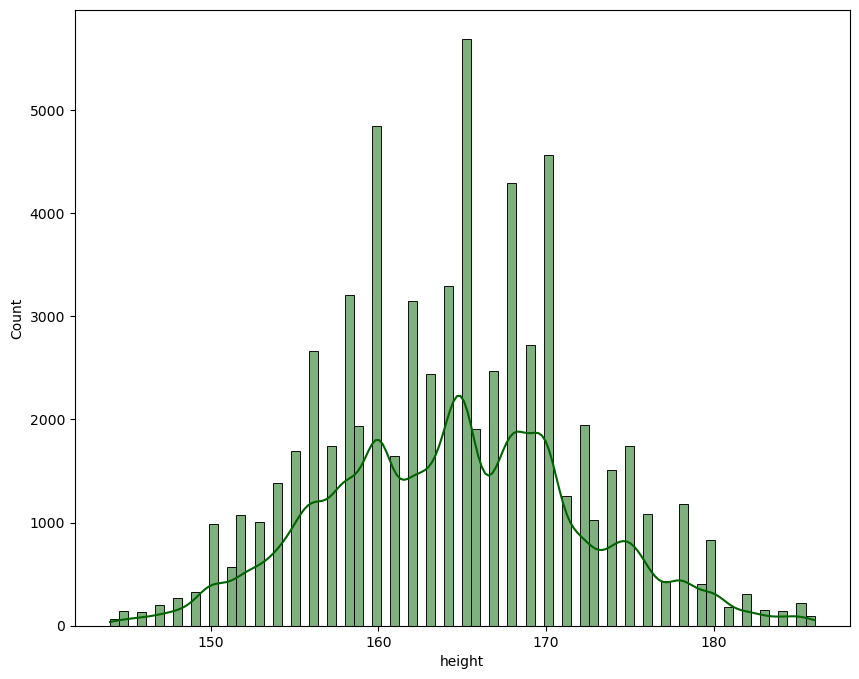

In [ ]:
# Distribution of height
plt.figure(figsize=(10,8))
sns.histplot(x='height', data = df, color = 'darkgreen', kde = True)

<Axes: xlabel='ap_hi', ylabel='Count'>

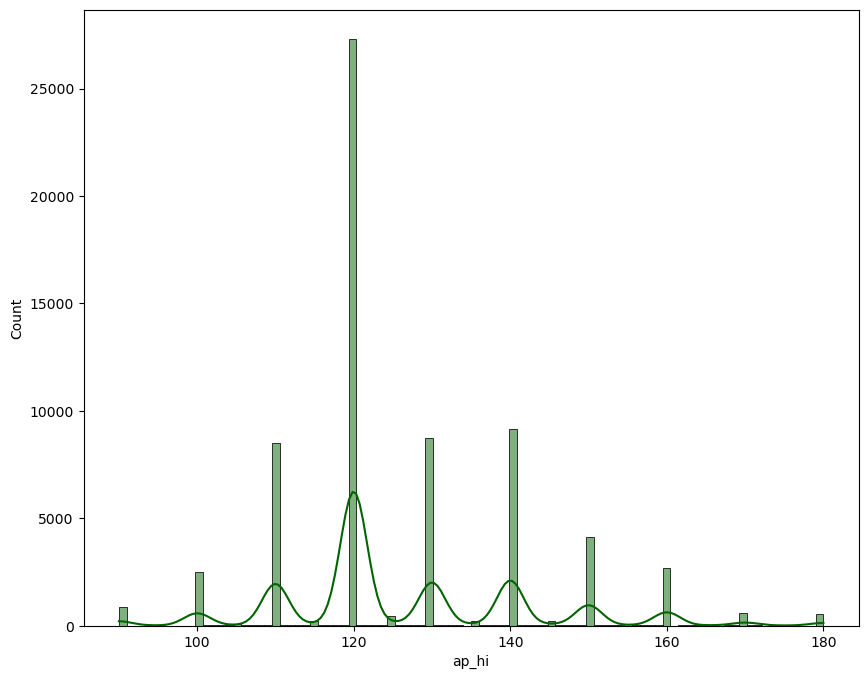

In [ ]:
# Distribution of ap_hi
plt.figure(figsize=(10,8))
sns.histplot(x='ap_hi', data = df, color = 'darkgreen', kde = True)

<Axes: xlabel='ap_lo', ylabel='Count'>

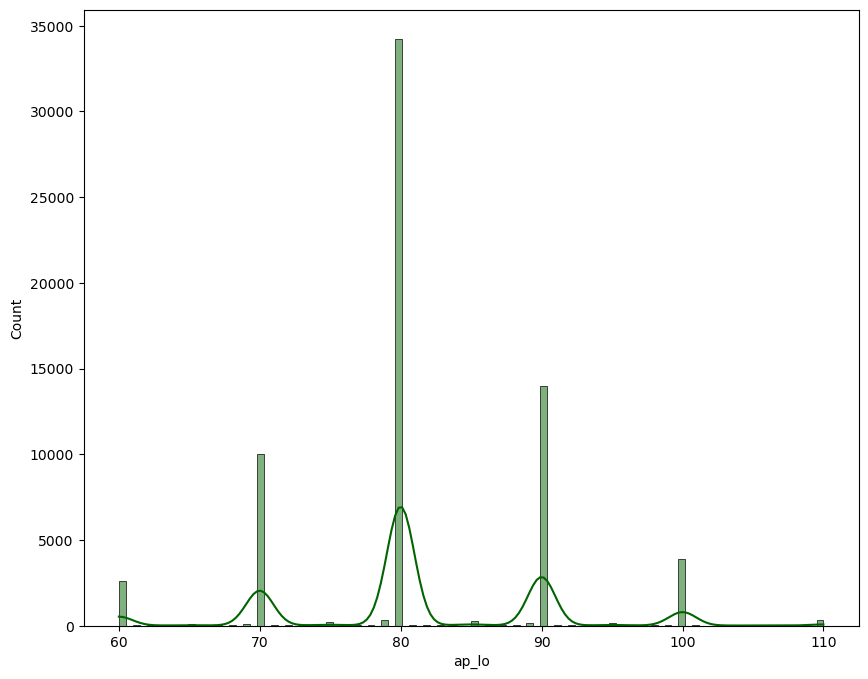

In [ ]:
# Distribution of ap_hi
plt.figure(figsize=(10,8))
sns.histplot(x='ap_lo', data = df, color = 'darkgreen', kde = True)

<Axes: xlabel='age', ylabel='Count'>

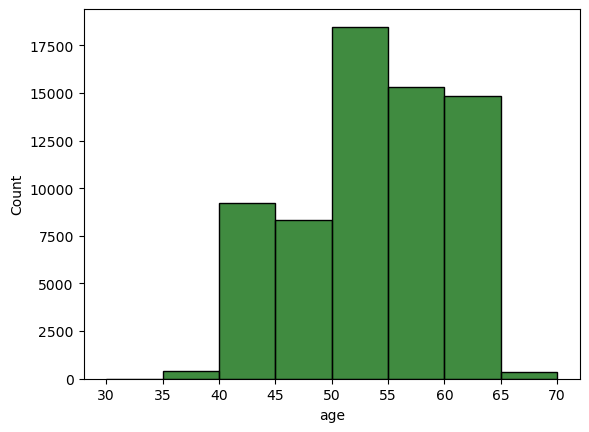

In [ ]:
# Age distribution
sns.histplot(x='age', data = df, bins = [30,35,40,45,50,55,60,65,70], color = 'darkgreen')

### Automated EDA

In [ ]:
pip install ydata-profiling


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 201.42it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

HTML report generated: file:///D:/Placement/Machine%20Learning(Classification)/eda_report.html

### Multivariate Analysis

Let's look at some attributes and how are they are influence the target class.  
For example, at what age does the number of people with CVD exceed the number of people without CVD? OR Does gender influence the likelihood of developing cardiovascular disease (CVD)?

Hypothesis
  
Hypothesis-1: Gender do not influence the likelihood of either developing or not developing cardiovascular disease (CVD).  
  
Hypothesis-2: Smoking can damage the heart, arteries, and blood vessels, increasing the risk of heart disease and stroke increasing chances of CVD.  
  
Hypothesis-3: Alcohol can increase blood pressure, weaken heart muscles, and cause heart failure. It can also lead to irregular heartbeats, which can be linked to sudden death increasing risk of CVD.
    
Hypothesis-4: Physical inactivity is a significant risk factor for CVD as people who are not active tend to be obese and weak which can mean poor heart health and can be a reason for CVD.  
  
Hypothesis-5: High levels of cholesterol can increase your risk of heart disease.

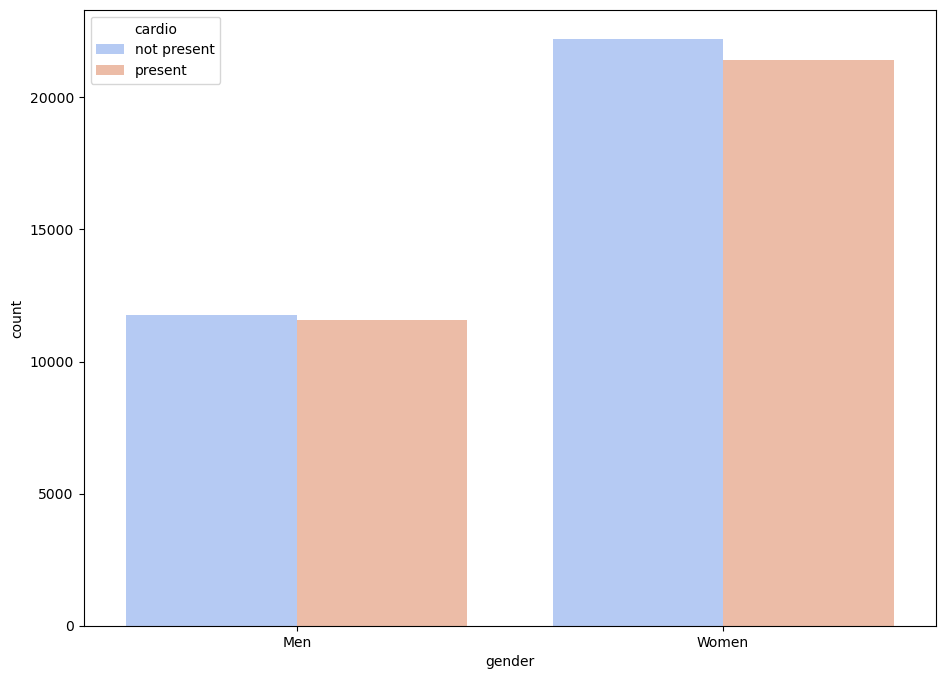

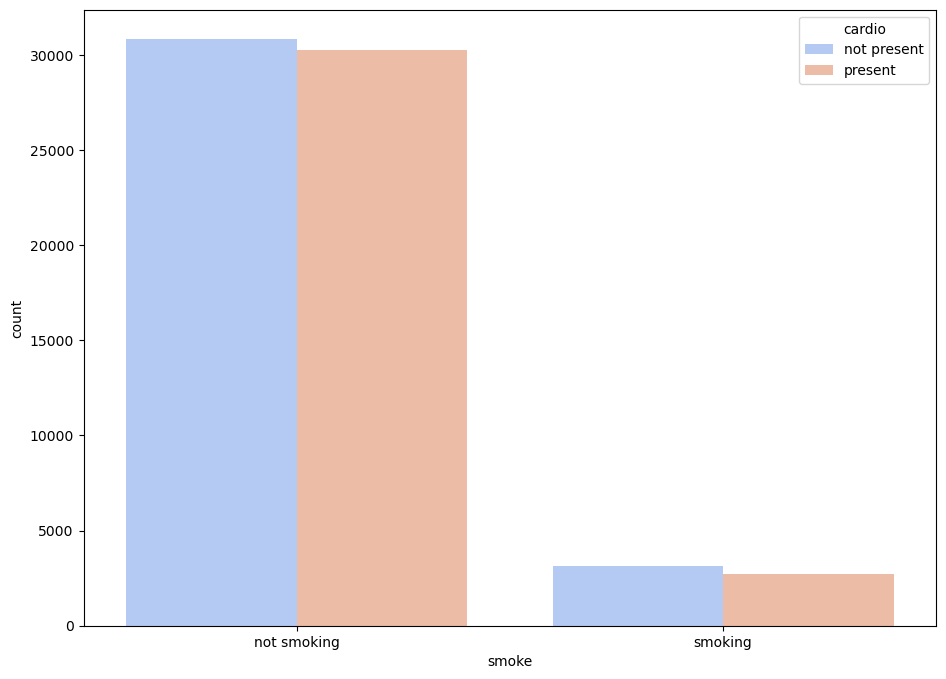

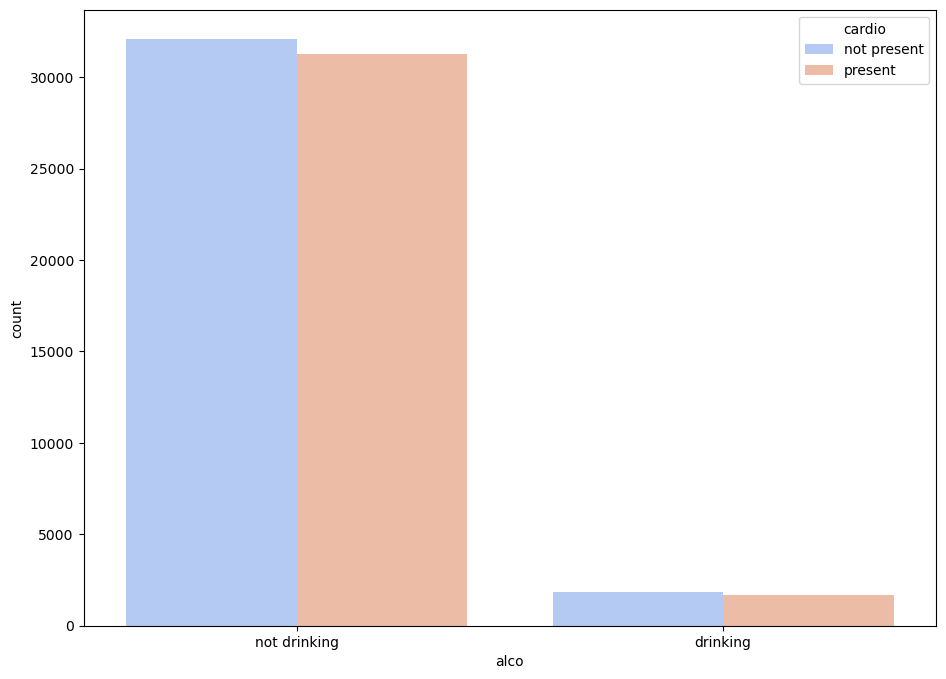

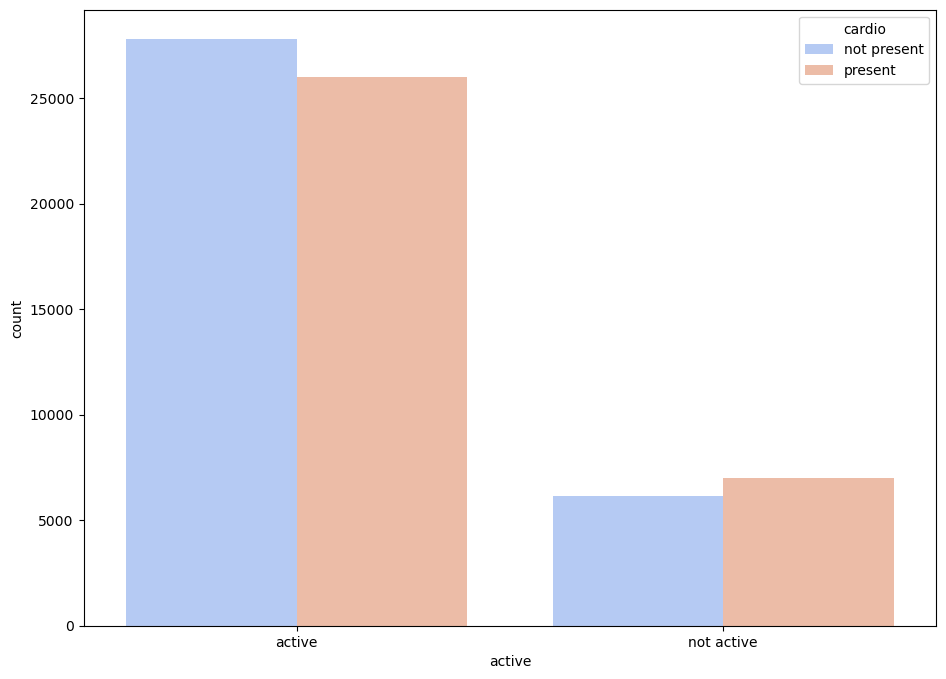

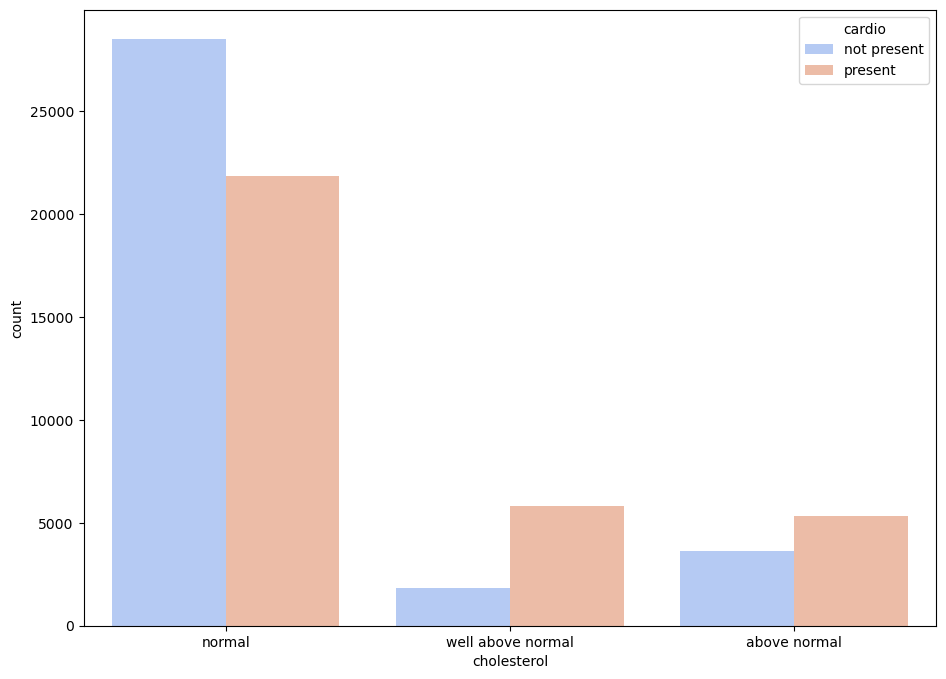

In [ ]:
cat_cols = ['gender', 'smoke', 'alco', 'active', 'cholesterol']

for i in cat_cols:
  plt.figure(figsize=(11,8))
  sns.countplot(x=i, hue='cardio', data = df, palette="coolwarm")
  plt.show()

Statistically

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# Define hypotheses
hypotheses = [
    {
        "name": "Hypothesis-1",
        "feature": "gender",
        "H0": "Gender does not influence the likelihood of developing CVD.",
        "H1": "Gender influences the likelihood of developing CVD."
    },
    {
        "name": "Hypothesis-2",
        "feature": "smoke",
        "H0": "Smoking does not influence the likelihood of developing CVD.",
        "H1": "Smoking influences the likelihood of developing CVD."
    },
    {
        "name": "Hypothesis-3",
        "feature": "alco",
        "H0": "Alcohol consumption does not influence the likelihood of developing CVD.",
        "H1": "Alcohol consumption influences the likelihood of developing CVD."
    },
    {
        "name": "Hypothesis-4",
        "feature": "active",
        "H0": "Physical inactivity does not influence the likelihood of developing CVD.",
        "H1": "Physical inactivity influences the likelihood of developing CVD."
    },
    {
        "name": "Hypothesis-5",
        "feature": "cholesterol",
        "H0": "Cholesterol level does not influence the likelihood of developing CVD.",
        "H1": "Cholesterol level influences the likelihood of developing CVD."
    },
]

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2_stat, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

# Perform Chi-square test and compute Cramér's V
alpha = 0.05
p_values = {}
cramers_v_values = {}

for hyp in hypotheses:
    feature = hyp["feature"]
    name = hyp["name"]

    print(f"\n{name}")
    print("H₀:", hyp["H0"])
    print("H₁:", hyp["H1"])

    # Contingency table
    contingency = pd.crosstab(df[feature], df['cardio'])
    print("\nContingency Table:")
    print(contingency)

    # Chi-square test
    chi2_stat, p, dof, expected = chi2_contingency(contingency)
    p_values[feature] = p

    # Cramér's V
    cramer_v = cramers_v(contingency)
    cramers_v_values[feature] = cramer_v

    # Strength interpretation
    if cramer_v < 0.01:
        strength = "very weak"
    elif cramer_v < 0.20:
        strength = "weak"
    elif cramer_v < 0.40:
        strength = "moderate"
    else:
        strength = "strong"

    # Print results
    print("\nChi-square Statistic:", round(chi2_stat, 4))
    print("Degrees of Freedom:", dof)
    print("p-value:", round(p, 6))
    print("Cramér's V:", round(cramer_v, 4))
    print(f"Since Cramér's V value is {round(cramer_v, 4)}, the strength of association is {strength}.")

    # Conclusion
    if p < alpha:
        print("\n➡ Conclusion: Reject H₀")
        print("✅ Interpretation:", hyp["H1"])
    else:
        print("\n➡ Conclusion: Fail to Reject H₀")
        print("❌ Interpretation:", hyp["H0"])

    print('-' * 100)

# Summary
print("\nSummary of p-values and Cramér's V:")
for feature in p_values:
    print(f"{feature}: p = {round(p_values[feature], 6)}, V = {round(cramers_v_values[feature], 4)}")



Hypothesis-1
H₀: Gender does not influence the likelihood of developing CVD.
H₁: Gender influences the likelihood of developing CVD.

Contingency Table:
cardio  not present  present
gender                      
Men           11751    11558
Women         22205    21410

Chi-square Statistic: 1.4837
Degrees of Freedom: 1
p-value: 0.223198
Cramér's V: 0.0047
Since Cramér's V value is 0.0047, the strength of association is very weak.

➡ Conclusion: Fail to Reject H₀
❌ Interpretation: Gender does not influence the likelihood of developing CVD.
----------------------------------------------------------------------------------------------------

Hypothesis-2
H₀: Smoking does not influence the likelihood of developing CVD.
H₁: Smoking influences the likelihood of developing CVD.

Contingency Table:
cardio       not present  present
smoke                            
not smoking        30825    30250
smoking             3131     2718

Chi-square Statistic: 19.8718
Degrees of Freedom: 1
p-value:

Conclusion
  
Conclusion-1: Our hypothesis is confirmed, gender does not significantly influence the likelihood of developing cardiovascular disease (CVD). The p-value is 0.223 and Cramér’s V is 0.0047 and  graphically, this is also visible, leading us to fail to reject the null hypothesis.
  
Conclusion-2: We hypothesized that smoking increases the risk of cardiovascular disease (CVD). The p-value of 8e-06 indicates statistical significance, while Cramér’s V value of 0.0172 suggests a weak association. Although our hypothesis is supported, the relationship appears weak, likely due to an imbalance in the number of smokers and non-smokers in the dataset, which can be clearly seen form the plot.
  
Conclusion-3:  We hypothesized that alcohol consumption increases the risk of cardiovascular disease (CVD). The p-value of 0.013 is statistically significant, but the Cramér’s V value of 0.0096 indicates a weak association. This suggests that while alcohol consumption is linked to CVD, its impact is minimal. While our hypothesis is supported, the effect is minimal and may require more balanced data on drinkers vs. non-drinkers to strengthen the claim.
  
Conclusion-4: We hypothesized that physical inactivity increases the risk of cardiovascular disease (CVD). The p-value of 0.00 indicates significance, and Cramér’s V of 0.0383 suggests a weak association. Thus, while physical inactivity does influence the likelihood of developing CVD, the relationship is not strong. A more balanced dataset including both active and inactive individuals may strengthen our findings.
  
Conclusion-5: We found that higher cholesterol levels significantly increase the risk of cardiovascular disease (CVD), with a p-value of 0.0 and Cramér’s V of 0.22 indicating a moderate association. The plot shows that individuals with normal cholesterol levels are far less likely to develop CVD, while those with cholesterol levels well above normal are almost certain to have it. This strongly supports our hypothesis that cholesterol is a key risk factor for CVD.

Hypothesis: As age increases, the likelihood of developing cardiovascular disease (CVD) also increases

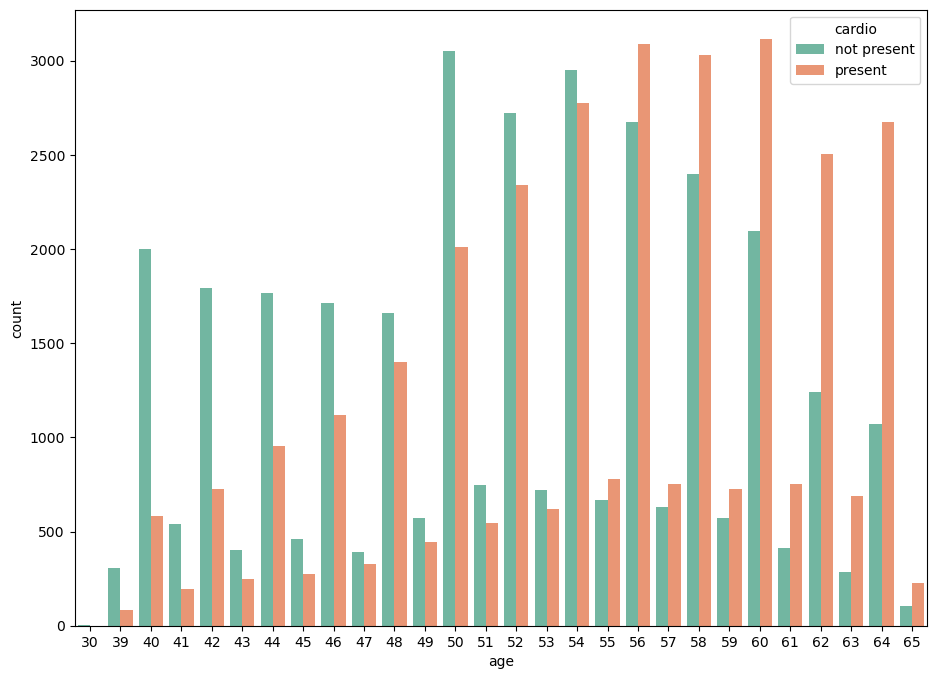

In [ ]:
# Column plot of age
plt.figure(figsize=(11,8))
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

<Axes: xlabel='age', ylabel='count'>

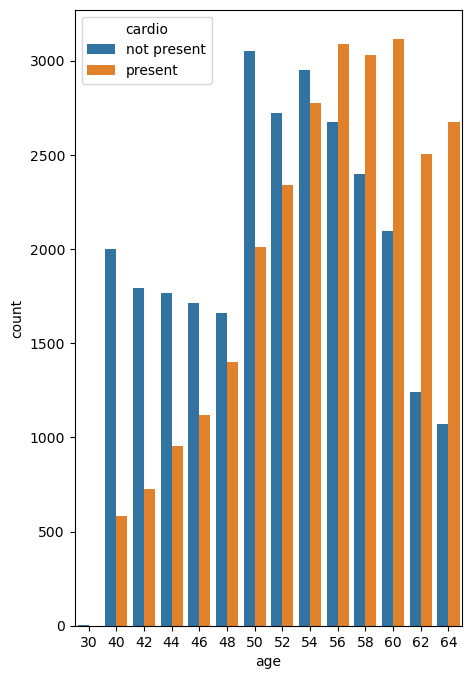

In [ ]:
# Filter the data for even ages
even_ages_df = df[df['age'] % 2 == 0]
odd_ages_df = df[df['age'] % 2 == 1]

# Create the plots
plt.figure(figsize=(11, 8))

# Plot for even ages
plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='cardio', data=even_ages_df)

<Axes: xlabel='age', ylabel='count'>

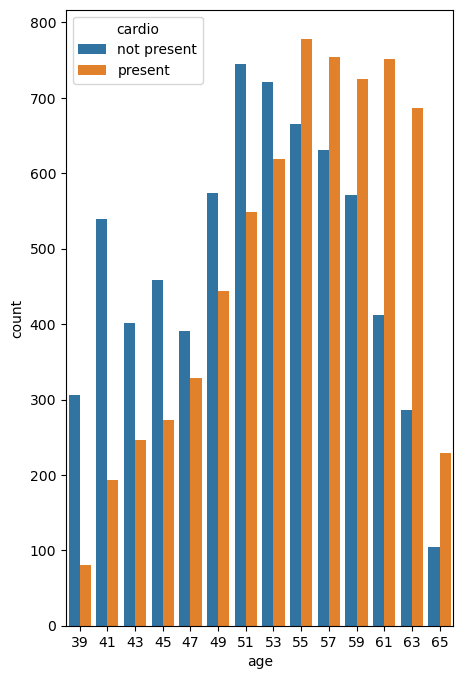

In [ ]:
# Filter the data for odd ages
even_ages_df = df[df['age'] % 2 == 0]
odd_ages_df = df[df['age'] % 2 == 1]

# Create the plots
plt.figure(figsize=(11, 8))

# Plot for even ages
plt.subplot(1, 2, 1)
sns.countplot(x='age', hue='cardio', data=odd_ages_df)

Text(0.5, 1.0, 'Distribution of Age (in Years) for each Cardio Category')

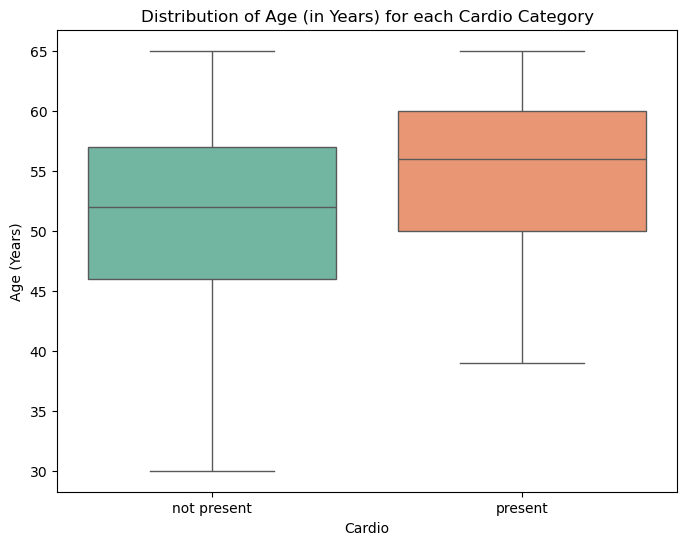

In [ ]:
# Box plot of age v/s cardio
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age', hue='cardio', data=df, palette = 'Set2')

plt.xlabel('Cardio')
plt.ylabel('Age (Years)')
plt.title('Distribution of Age (in Years) for each Cardio Category')

Conclusion: Thus, our hypothesis is correct as it can be observed that people over the age of 55 are more susceptible to cardiovascular disease (CVD). The reason for plotting separate graphs for even and odd-aged people is that there are fewer odd-aged individuals, making it unclear if the prevalence of CVD increases with age from the countplot, And from the box plot it is also evident that the Low(Q1 - 1.5* IQR) and median people having CVD is greater than those who don't suffer from it.Overall, it is evident that the likelihood of developing CVD increases with age.

Hypothesis: As a person's BMI increases beyond a threshold, we can infer that their health condition is not optimal, putting them at a higher risk of cardiovascular disease (CVD).

In [22]:
# BMI (kg/m²) = (weight in kg) / (height Convert it from cm to m)²
df['bmi'] = ((df['weight']) / ((df['height']*0.01) ** 2)).round(2)


<Axes: xlabel='bmi', ylabel='Count'>

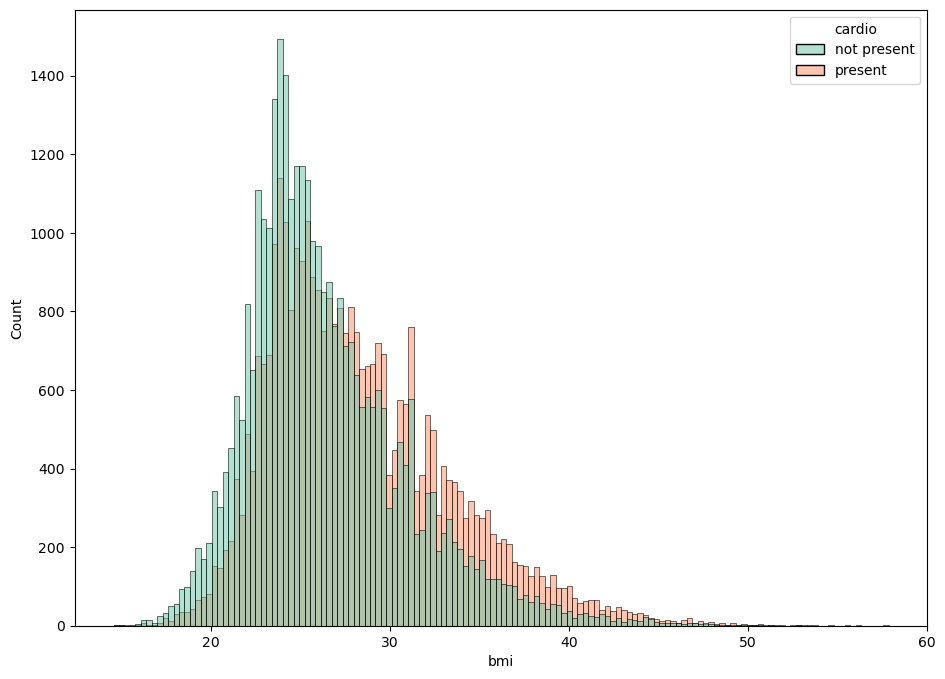

In [23]:
plt.figure(figsize=(11,8))
sns.histplot(x='bmi', hue='cardio', data = df, palette="Set2")

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df['bmi'])
y = (df['cardio'] == 'present').astype(int)

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.674830
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                66924
Model:                          Logit   Df Residuals:                    66922
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                 0.02627
Time:                        00:05:24   Log-Likelihood:                -45162.
converged:                       True   LL-Null:                       -46381.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2242      0.047    -47.787      0.000      -2.315      -2.133
bmi            0.0803      0.

Conclusion: From the plot, we can conclude that our hypothesis is correct. As BMI exceeds a certain threshold (27), the proportion of individuals with CVD increases as compared to pople with BMI less than that, indicating deteriorating health.

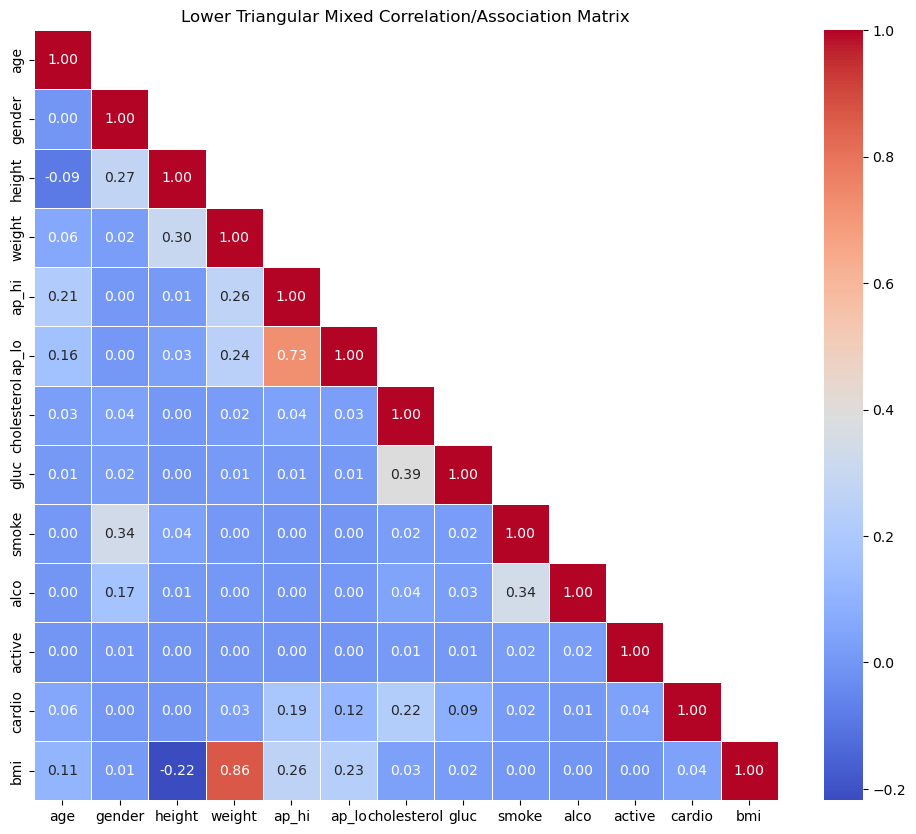

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# --- Helper functions ---
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1))) if min(kcorr - 1, rcorr - 1) > 0 else 0

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg = np.mean(measurements)
    ss_total = np.sum((measurements - y_avg) ** 2)
    ss_between = sum([
        np.sum((measurements[fcat == i].mean() - y_avg) ** 2) * len(measurements[fcat == i])
        for i in range(cat_num)
    ])
    return ss_between / ss_total if ss_total > 0 else 0

# --- Column type identification ---
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
num_cols = [col for col in df.columns if col not in cat_cols]

# --- Compute mixed association matrix ---
assoc = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            assoc.loc[col1, col2] = 1.0
        elif col1 in cat_cols and col2 in cat_cols:
            assoc.loc[col1, col2] = cramers_v(df[col1], df[col2])
        elif col1 in num_cols and col2 in num_cols:
            assoc.loc[col1, col2] = df[col1].corr(df[col2])
        elif col1 in cat_cols and col2 in num_cols:
            assoc.loc[col1, col2] = correlation_ratio(df[col1], df[col2])
        else:
            assoc.loc[col1, col2] = correlation_ratio(df[col2], df[col1])

assoc = assoc.astype(float)

# --- Mask to hide upper triangle *excluding* the diagonal ---
mask = np.triu(np.ones_like(assoc, dtype=bool), k=1)

# --- Plot lower triangle heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(assoc, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title("Lower Triangular Mixed Correlation/Association Matrix")
plt.show()


# Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['cholesterol'] = le.fit_transform(df['cholesterol'])
df['gluc'] = le.fit_transform(df['gluc'])
df['smoke'] = le.fit_transform(df['smoke'])
df['alco'] = le.fit_transform(df['alco'])
df['active'] = le.fit_transform(df['active'])
df['cardio'] = le.fit_transform(df['cardio']).astype(int)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,0,168,62.0,110,80,1,1,0,1,0,0,21.97
1,55,1,156,85.0,140,90,2,1,0,1,0,1,34.93
2,52,1,165,64.0,130,70,2,1,0,1,1,1,23.51
3,48,0,169,82.0,150,100,1,1,0,1,0,1,28.71
4,48,1,156,56.0,100,60,1,1,0,1,1,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,1,165,80.0,150,80,1,1,0,1,0,1,29.38
69995,53,0,168,76.0,120,80,1,1,1,1,0,0,26.93
69997,52,0,183,105.0,180,90,2,1,0,0,1,1,31.35
69998,61,1,163,72.0,135,80,1,0,0,1,1,1,27.10


In [25]:
# Saving the csv
df.to_csv('ML_Classification_df_for_model.csv', index=False)

# Models

📊 Class Distribution:
cardio
0    33956
1    32968
Name: count, dtype: int64

🔎 Percentage Distribution:
cardio
0    50.74
1    49.26
Name: count, dtype: float64


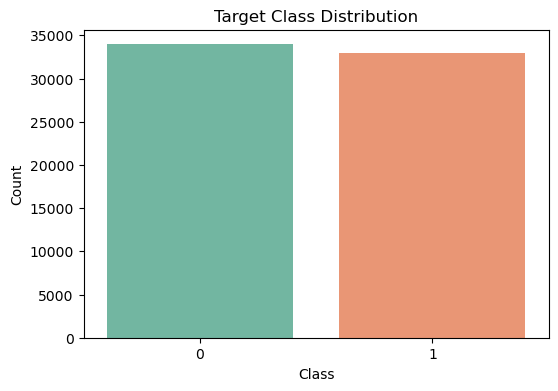

In [ ]:
# Chekcking imbalance
# Check class distribution
class_counts = df['cardio'].value_counts()

print("📊 Class Distribution:")
print(class_counts)
print("\n🔎 Percentage Distribution:")
print((class_counts / len(df['cardio']) * 100).round(2))

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, palette="Set2")
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [9]:
# 1. Load important libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, VotingClassifier, BaggingClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Set random seed for reproducibility
np.random.seed(42)

In [11]:
# 2. Load dataset and seperate target attribute
df = pd.read_csv("D:\Placement\Machine Learning(Classification)\ML_Classification_df_for_model.csv")
X = df.drop(columns=["cardio", "height", "gender"])
y = df["cardio"]

In [12]:
# 3. Train-validation-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [13]:
# 4. StandardScaler on numerical columns for train set
numerical_cols = ['age', 'ap_hi', 'ap_lo', 'bmi']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply same scaling to validation and test sets
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [14]:
# 5. Full dictionary: models + hyperparameter grids
models = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.01, 0.1, 1],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'lbfgs']
        }
    ),

    'KNN': (
        KNeighborsClassifier(),
        {
            'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19],
            'weights': ['uniform', 'distance']
        }
    ),

    'Decision Tree': (
        DecisionTreeClassifier(),
        {
            'max_depth': [10, 11, 12, 13, 14, 15, 20],
            'min_samples_split': [2, 3, 4, 5, 6],
            'min_samples_leaf': [1, 2, 3, 4, 5, 6]
        }
    ),

    'Random Forest': (
        RandomForestClassifier(),
        {
            'n_estimators': [25, 50, 60, 70, 75, 80, 90, 100, 150, 200],
            'max_depth': list(range(5, 16)),
            'criterion': ['gini', 'entropy']
        }
    ),

    'AdaBoost': (
        AdaBoostClassifier(),
        {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.1, 1.0]
        }
    ),

    'Gradient Boosting': (
        GradientBoostingClassifier(),
        {
            'n_estimators': [50, 100, 150, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [2, 3, 4, 5]
        }
    ),

    'XGBoost': (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        {
            'n_estimators': [150, 200, 250],
            'max_depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.1]
        }
    ),

    'CatBoost': (
        CatBoostClassifier(verbose=0),
        {
            'iterations': [200, 210, 220, 225],
            'depth': [4, 5, 6, 7, 8],
            'learning_rate': [0.01, 0.1]
        }
    ),

    'Bagging': (
        BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100),
        {
            'estimator__max_depth': [None, 10, 12, 15, 20],
            'n_estimators': [50, 100, 150]
        }
    ),
 
    'Pasting': (
        BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=False),
        {
            'estimator__max_depth': [None, 10, 12, 15, 20],
            'n_estimators': [50, 100, 150]
        }
    ),

    'Voting Hard': (
        VotingClassifier(
            estimators=[
                ('lr', LogisticRegression(max_iter=1000)),
                ('rf', RandomForestClassifier()),
                ('knn', KNeighborsClassifier())
            ],
            voting='hard'
      ),
      {
            'lr__C': [0.01, 0.1, 1],
            'rf__n_estimators': [100, 150, 200],
            'knn__n_neighbors': [3, 5, 7]
      }
    ),

    'Voting Soft': (
        VotingClassifier(
            estimators=[
                ('lr', LogisticRegression(max_iter=1000)),
                ('rf', RandomForestClassifier()),
                ('knn', KNeighborsClassifier())
            ],
            voting='soft'
        ),
        {
            'lr__C': [0.01, 0.1, 1],
            'rf__n_estimators': [100, 150, 200],
            'knn__n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19]
        }
    ),

    'Stacking': (
        StackingClassifier(
            estimators=[
                ('lr', LogisticRegression(max_iter=1000)),
                ('rf', RandomForestClassifier()),
                ('knn', KNeighborsClassifier())
            ],
            final_estimator=LogisticRegression(max_iter=1000)
        ),
        {
            'lr__C': [0.01, 0.1, 1],
            'rf__n_estimators': [100, 200],
            'knn__n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19]
        }
    ),
    
    # 'SVM': (
    #     SVC(probability=True),
    #     {
    #         'C': [0.1],
    #         'kernel': ['poly'],
    #         'gamma': ['auto']
    #     }
    # )
}

In [15]:
# 6. Hyperparameter tuning and performance evaluation
best_models = {}
results = []

for name, (model, param_grid) in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Best model for this algorithm
    best_models[name] = grid.best_estimator_

    # Performance on train, validation
    train_pred = grid.best_estimator_.predict(X_train)
    val_pred = grid.best_estimator_.predict(X_val)
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    train_f1 = f1_score(y_train, train_pred)
    val_f1 = f1_score(y_val, val_pred)

    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Train F1': train_f1,
        'Validation Accuracy': val_acc,
        'Validation F1': val_f1,
        'Best Params': grid.best_params_
    })

Tuning Logistic Regression...


Tuning KNN...
Tuning Decision Tree...
Tuning Random Forest...
Tuning AdaBoost...
Tuning Gradient Boosting...
Tuning XGBoost...
Tuning CatBoost...
Tuning Bagging...
Tuning Pasting...
Tuning Voting Hard...
Tuning Voting Soft...
Tuning Stacking...


In [16]:
# Train best models on train+val with new scaling
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Create a new scaler for train+val
print("Applying new scaling to train+val and test sets...")
final_scaler = StandardScaler()
X_train_val[numerical_cols] = final_scaler.fit_transform(X_train_val[numerical_cols])

# Transform test set using the new scaler
X_test_transformed = X_test.copy()
X_test_transformed[numerical_cols] = final_scaler.transform(X_test[numerical_cols])

Applying new scaling to train+val and test sets...


In [17]:
# 7. Evaluate Best Models on Train, Validation, and Test Sets

final_models = {}
final_results = []

for name, model in best_models.items():  # best_models has best estimators from tuning
    print(f"\n{'='*40}\nTraining {name}...\n")

    # Print hyperparameters of the model
    print(f"Hyperparameters used for {name}:")
    params = model.get_params()
    for key, value in params.items():
        print(f"  {key}: {value}")

    # --- Train Performance ---
    print(f"\n{name} Performance on Train Set:")
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_precision = precision_score(y_train, train_pred)
    train_recall = recall_score(y_train, train_pred)
    train_f1 = f1_score(y_train, train_pred)
    print(f"Accuracy:  {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall:    {train_recall:.4f}")
    print(f"F1-Score:  {train_f1:.4f}")

    # --- Validation Performance ---
    print(f"\n{name} Performance on Validation Set:")
    val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_precision = precision_score(y_val, val_pred)
    val_recall = recall_score(y_val, val_pred)
    val_f1 = f1_score(y_val, val_pred)
    print(f"Accuracy:  {val_accuracy:.4f}")
    print(f"Precision: {val_precision:.4f}")
    print(f"Recall:    {val_recall:.4f}")
    print(f"F1-Score:  {val_f1:.4f}")

    # Retrain on full train+val
    model.fit(X_train_val, y_train_val)
    final_models[name] = model

    # --- Test Performance ---
    test_pred = model.predict(X_test_transformed)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_precision = precision_score(y_test, test_pred)
    test_recall = recall_score(y_test, test_pred)
    test_f1 = f1_score(y_test, test_pred)

    print(f"\n{name} Performance on Test Set:")
    print(f"Accuracy:  {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall:    {test_recall:.4f}")
    print(f"F1-Score:  {test_f1:.4f}")

    print(f"\nClassification Report for {name} on Test Set:")
    print(classification_report(y_test, test_pred))
    print('-' * 100)

    final_results.append({
        'Model': name,
        'Train Accuracy': train_accuracy,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Val Accuracy': val_accuracy,
        'Val Precision': val_precision,
        'Val Recall': val_recall,
        'Val F1': val_f1,
        'Test Accuracy': test_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1
    })                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# Final performance summary on train, val and test sets
final_results_df = pd.DataFrame(final_results)
print("\nFinal Model Performance Summary (Train + Validation + Test):")
final_results_df



Training Logistic Regression...

Hyperparameters used for Logistic Regression:
  C: 0.01
  class_weight: None
  dual: False
  fit_intercept: True
  intercept_scaling: 1
  l1_ratio: None
  max_iter: 1000
  multi_class: deprecated
  n_jobs: None
  penalty: l2
  random_state: None
  solver: liblinear
  tol: 0.0001
  verbose: 0
  warm_start: False

Logistic Regression Performance on Train Set:
Accuracy:  0.7232
Precision: 0.7468
Recall:    0.6629
F1-Score:  0.7024

Logistic Regression Performance on Validation Set:
Accuracy:  0.7217
Precision: 0.7484
Recall:    0.6555
F1-Score:  0.6989

Logistic Regression Performance on Test Set:
Accuracy:  0.7276
Precision: 0.7478
Recall:    0.6744
F1-Score:  0.7092

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      5094
           1       0.75      0.67      0.71      4945

    accuracy                           0.73     10039
   macro avg  

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Val Accuracy,Val Precision,Val Recall,Val F1,Test Accuracy,Test Precision,Test Recall,Test F1
0,Logistic Regression,0.723242,0.746827,0.662911,0.702371,0.721685,0.748384,0.655479,0.698858,0.727563,0.747758,0.674419,0.709197
1,KNN,0.745357,0.765126,0.697058,0.729507,0.707740,0.724253,0.656894,0.688931,0.718697,0.730694,0.679272,0.704045
2,Decision Tree,0.752145,0.763780,0.719331,0.740890,0.714513,0.725989,0.675495,0.699832,0.727861,0.732214,0.705561,0.718641
3,Random Forest,0.763395,0.790036,0.707804,0.746663,0.724275,0.745491,0.668621,0.704967,0.737922,0.761883,0.680688,0.719000
4,AdaBoost,0.729582,0.767267,0.647441,0.702280,0.724076,0.761287,0.640922,0.695939,0.734037,0.768342,0.658645,0.709277
5,Gradient Boosting,0.737075,0.754663,0.690861,0.721354,0.726367,0.742769,0.680146,0.710079,0.739018,0.755326,0.695450,0.724152
6,XGBoost,0.738825,0.755491,0.694631,0.723784,0.726467,0.742291,0.681359,0.710521,0.736727,0.752302,0.694034,0.721994
7,CatBoost,0.744781,0.764270,0.696841,0.729000,0.726566,0.745373,0.675900,0.708939,0.737225,0.755143,0.690394,0.721318
8,Bagging,0.762242,0.784519,0.713264,0.747197,0.724475,0.744066,0.671856,0.706120,0.736727,0.753524,0.691810,0.721349
9,Pasting,0.752380,0.763948,0.719721,0.741175,0.714713,0.726304,0.675495,0.699979,0.728160,0.732383,0.706168,0.719036


In [18]:
# Select best model based on Test F1-score
best_model_name = final_results_df.loc[final_results_df['Test F1'].idxmax(), 'Model']
best_model = final_models[best_model_name]
print(f"\nBest Model: {best_model_name}")

# Save best model and final scaler
import joblib
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(final_scaler, 'scaler.pkl')


Best Model: Gradient Boosting


['scaler.pkl']

In [19]:
# Now train the best of best model on whole(train+val+test) dataset

# 1. Combine all data
X_full = pd.concat([X_train, X_val, X_test], ignore_index=True)
y_full = pd.concat([y_train, y_val, y_test], ignore_index=True)

# 2. Fit scaler on full data and transform
scaler_streamlit = StandardScaler()
X_full[numerical_cols] = scaler_streamlit.fit_transform(X_full[numerical_cols])

# 3. Train best model on full data
best_model_streamlit = best_model
best_model_streamlit.fit(X_full, y_full)

# 4. Save model and scaler
joblib.dump(best_model_streamlit, 'best_model_streamlit.pkl')
joblib.dump(scaler_streamlit, 'scaler_streamlit.pkl')

print("Best model and scaler saved as 'best_model_streamlit.pkl' and 'scaler_streamlit.pkl'.")


Best model and scaler saved as 'best_model_streamlit.pkl' and 'scaler_streamlit.pkl'.


In [34]:
# 9. Streamlit app code
streamlit_code = """
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('best_model_streamlit.pkl')
scaler = joblib.load('scaler_streamlit.pkl')

# Streamlit app
st.title('Cardiovascular Disease Prediction')

# Input fields for features
age = st.number_input('Age (in years)', min_value=0, max_value=120, value=50)
height = st.number_input('Height (in cm)', min_value=50, max_value=250, value=170)
weight = st.number_input('Weight (in kg)', min_value=30, max_value=200, value=70)
ap_hi = st.number_input('Systolic Blood Pressure (ap_hi)', min_value=50, max_value=250, value=120)
ap_lo = st.number_input('Diastolic Blood Pressure (ap_lo)', min_value=30, max_value=150, value=80)
bmi = weight / ((height / 100) ** 2)

# Other features
gender = st.selectbox('Gender', [0, 1], format_func=lambda x: 'Female' if x == 0 else 'Male')  # Just for UI
cholesterol = st.selectbox('Cholesterol', [1, 2, 3], format_func=lambda x: ['Normal', 'Above Normal', 'Well Above Normal'][x-1])
gluc = st.selectbox('Glucose', [1, 2, 3], format_func=lambda x: ['Normal', 'Above Normal', 'Well Above Normal'][x-1])
smoke = st.selectbox('Smoking', [0, 1], format_func=lambda x: 'No' if x == 0 else 'Yes')
alco = st.selectbox('Alcohol Intake', [0, 1], format_func=lambda x: 'No' if x == 0 else 'Yes')
active = st.selectbox('Physical Activity', [0, 1], format_func=lambda x: 'No' if x == 0 else 'Yes')

# Define the column order used during model training
column_order = [
    'age', 'weight', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi'
]

# Prepare input_data for model prediction in correct order
input_data = pd.DataFrame([[
    age, weight, ap_hi, ap_lo,
    cholesterol, gluc, smoke, alco, active, bmi
]], columns=column_order)

# Scale numerical columns
numerical_cols = ['age', 'ap_hi', 'ap_lo', 'bmi']
input_data[numerical_cols] = scaler.transform(input_data[numerical_cols])

# Prediction
if st.button('Predict'):
    prediction = model.predict(input_data)[0]
    prob = model.predict_proba(input_data)[0][1] if hasattr(model, 'predict_proba') else None
    st.write(f"Prediction: {'Cardiovascular Disease' if prediction == 1 else 'No Cardiovascular Disease'}")
    if prob is not None:
        st.write(f"Probability of Cardiovascular Disease: {prob:.2%}")

"""

# Save Streamlit app code
with open('app.py', 'w') as f:
    f.write(streamlit_code)

print("Streamlit app code saved as 'app.py'. Run it using: streamlit run app.py")

Streamlit app code saved as 'app.py'. Run it using: streamlit run app.py


       Feature  Importance
2        ap_hi    0.743672
0          age    0.128896
4  cholesterol    0.074415
9          bmi    0.014805
3        ap_lo    0.014105
1       weight    0.008345
8       active    0.006058
5         gluc    0.005461
6        smoke    0.002830
7         alco    0.001414


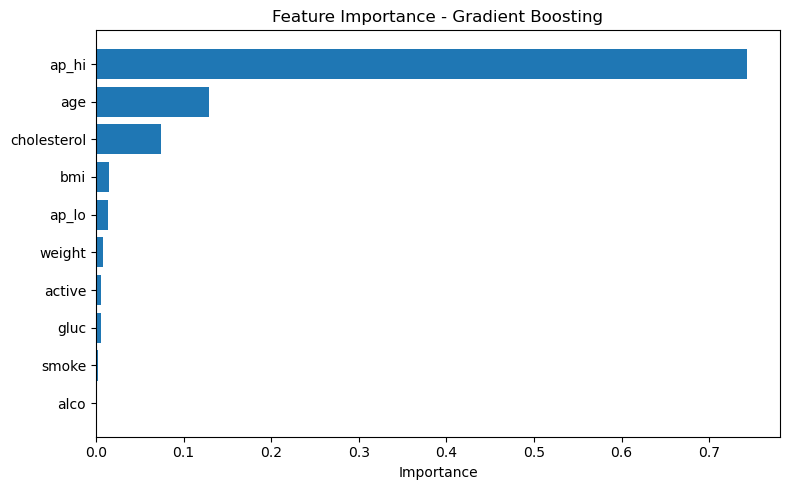

In [36]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load your model
model = joblib.load('best_model_streamlit.pkl')

# Define the features used during training (order matters!)
feature_names = ['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi']

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for readability
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the table
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Gradient Boosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
